In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt

# Data Preparation

In [8]:
df = pd.read_csv("mnist_train2.csv")
print(df.shape)

(42000, 785)


In [9]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [10]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [13]:
x=data[:,1:]
y=data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [14]:
split =int(0.8*x.shape[0])
print(split)

x_train =x[:split,:]
y_train =y[:split]

x_test =x[split:,:]
y_test =y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


33600
(33600, 784) (33600,)
(8400, 784) (8400,)


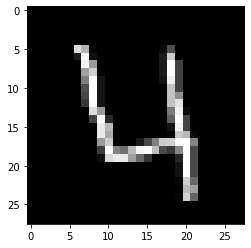

1


In [16]:
def drawing(sample):
    img = sample.reshape((28,28))
    pt.imshow(img,cmap="gray")
    pt.show()
    
drawing(x_train[3])
print(y_train[0])

# KNN

In [24]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,queryPoint,k=5):
    
    vals =[]
    
    m=x.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,-1],return_counts=True)
    index = new_vals[1].argmax()
    pre = new_vals[0][index]
    return pre

# Make_ Predictions

In [45]:
pred =knn(x_train,y_train,x_test[7])
print(int(pred))

7


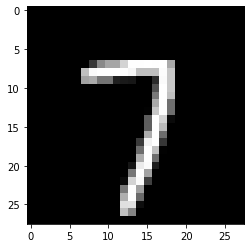

7


In [46]:
drawing(x_test[7])
print(y_test[7])